In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
root_path = '../'
datasets = ['yelp-full'] # agnews, 'mnli',, 'yahoo','yelp-full'
methods = ['fedpet'] # 'fedclassifier',
clients_in_total_list=[(2**i)*10 for i in range(6)]  # todo 10 50 100
samples_per_client_list=[(2**i) for i in range(6)] 
client_per_round = 5

# datasets = ['yelp-full'] # agnews, 'mnli',, 'yahoo','yelp-full'
# methods = ['fedpet'] # 'fedclassifier',
# clients_in_total_list=[100]  # todo 10 50 100
# samples_per_client_list=[1,5,10,50,100] 
# client_per_round = 10

iter = 100


log_paths_all = {}
csv_paths_all = {}
for dataset in datasets:
    log_paths_all[dataset] = []
    csv_paths_all[dataset] = []
    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, client_per_round)
            for samples_per_client in samples_per_client_list:
                sampled_data = clients_in_total * samples_per_client
                log_paths_all[dataset].append(os.path.join(root_path, 'log', dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
                csv_paths_all[dataset].append(os.path.join(root_path, "data", dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))


In [3]:
csv_paths_all

{'yelp-full': ['../data/yelp-full/fedpet_10_10.csv',
  '../data/yelp-full/fedpet_20_10.csv',
  '../data/yelp-full/fedpet_40_10.csv',
  '../data/yelp-full/fedpet_80_10.csv',
  '../data/yelp-full/fedpet_160_10.csv',
  '../data/yelp-full/fedpet_320_10.csv',
  '../data/yelp-full/fedpet_20_20.csv',
  '../data/yelp-full/fedpet_40_20.csv',
  '../data/yelp-full/fedpet_80_20.csv',
  '../data/yelp-full/fedpet_160_20.csv',
  '../data/yelp-full/fedpet_320_20.csv',
  '../data/yelp-full/fedpet_640_20.csv']}

In [4]:
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

In [5]:
i = 0
for dataset in datasets:
    log_paths = log_paths_all[dataset]
    csv_paths = csv_paths_all[dataset]
    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, client_per_round)
            for samples_per_client in samples_per_client_list:
                print("clients_in_total: {clients_in_total}; samples_per_client: {samples_per_client}".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client))
                
                sampled_data = clients_in_total * samples_per_client
                log_path = log_paths[i]
                phrase = 'INFO //data/cdq/pet_data/log/' + dataset + '/' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
                print(phrase)
                with open(log_path) as f:
                    f = f.readlines()
                df = pd.DataFrame(data=None, index = range(iter), columns = range(clients))

                for line in f:
                    if phrase in line:
                        # print(gen,client)
                        gen = int(re.findall(r'/g(.+?)/',line)[0])
                        client = int(re.findall(r'client(.+?)',line)[0])
                        
                        if f.index(line)+2 > len(f):
                            break
                        score_line = f[f.index(line)+2]
                        acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
                        df[client][gen]=acc
                df.to_csv(csv_paths[i])
                i = i+1

        # print(log_path)
        # print(df)


clients_in_total: 10; samples_per_client: 1
INFO //data/cdq/pet_data/log/yelp-full/fedpet_10_10
clients_in_total: 10; samples_per_client: 2
INFO //data/cdq/pet_data/log/yelp-full/fedpet_20_10
clients_in_total: 10; samples_per_client: 4
INFO //data/cdq/pet_data/log/yelp-full/fedpet_40_10
clients_in_total: 10; samples_per_client: 8
INFO //data/cdq/pet_data/log/yelp-full/fedpet_80_10
clients_in_total: 10; samples_per_client: 16
INFO //data/cdq/pet_data/log/yelp-full/fedpet_160_10
clients_in_total: 10; samples_per_client: 32
INFO //data/cdq/pet_data/log/yelp-full/fedpet_320_10
clients_in_total: 20; samples_per_client: 1
INFO //data/cdq/pet_data/log/yelp-full/fedpet_20_20
clients_in_total: 20; samples_per_client: 2
INFO //data/cdq/pet_data/log/yelp-full/fedpet_40_20
clients_in_total: 20; samples_per_client: 4
INFO //data/cdq/pet_data/log/yelp-full/fedpet_80_20
clients_in_total: 20; samples_per_client: 8
INFO //data/cdq/pet_data/log/yelp-full/fedpet_160_20
clients_in_total: 20; samples_per_c

In [6]:
df = pd.DataFrame(index = clients_in_total_list, columns = samples_per_client_list)

100
clients_in_total: 10; samples_per_client: 1 max accuracy is:  0.38488
100
clients_in_total: 10; samples_per_client: 2 max accuracy is:  0.35960000000000003
100
clients_in_total: 10; samples_per_client: 4 max accuracy is:  0.35812
100
clients_in_total: 10; samples_per_client: 8 max accuracy is:  0.39499999999999996
100
clients_in_total: 10; samples_per_client: 16 max accuracy is:  0.40692000000000006
100
clients_in_total: 10; samples_per_client: 32 max accuracy is:  0.4466
38
clients_in_total: 20; samples_per_client: 1 max accuracy is:  0.3524
100
clients_in_total: 20; samples_per_client: 2 max accuracy is:  0.36664
100
clients_in_total: 20; samples_per_client: 4 max accuracy is:  0.4039999999999999
100
clients_in_total: 20; samples_per_client: 8 max accuracy is:  0.4196
100
clients_in_total: 20; samples_per_client: 16 max accuracy is:  0.43911999999999995
100
clients_in_total: 20; samples_per_client: 32 max accuracy is:  0.47648
../fig/eval-performance-yelp-full_640.pdf


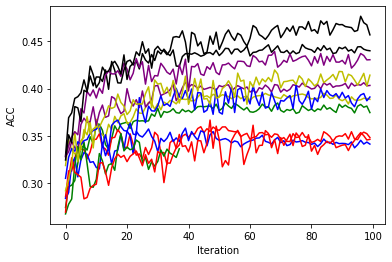

In [7]:
i = 0

df_heatmap = pd.DataFrame(index = clients_in_total_list, columns = samples_per_client_list)

for dataset in datasets:
    fig = plt.figure()
    # plt.title(dataset)
    plt.xlabel('Iteration')
    plt.ylabel('ACC')
    csv_paths = csv_paths_all[dataset]

    for method in methods:
        for clients_in_total in clients_in_total_list:
            clients = min(clients_in_total, 10)
            for samples_per_client in samples_per_client_list:
                csv_path = csv_paths[i]

                df = pd.read_csv(csv_path,index_col=0)

                df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列

                iter = len(df.index)
                print(iter)
                y_mean = []
                for j in range(iter):
                    x = np.array([j]*clients)
                    y = np.array(df.iloc[j])

                    y_mean.append(pd.DataFrame(y).dropna().mean())
                    # plt.scatter(x, y,color=colors[i])
                print("clients_in_total: {clients_in_total}; samples_per_client: {samples_per_client} max accuracy is: ".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client), float(np.max(pd.DataFrame(y_mean).dropna())))

                df_heatmap[samples_per_client][clients_in_total] = float(np.max(pd.DataFrame(y_mean).dropna()))

                client_index = clients_in_total_list.index(clients_in_total)
                sample_index = samples_per_client_list.index(samples_per_client)
                plt.plot(range(iter),y_mean,color=colors[sample_index],label="clients: {clients_in_total}; samples: {samples_per_client}".format(clients_in_total = clients_in_total, samples_per_client=samples_per_client))
                i = i+1
    # plt.legend()
    print("../fig/eval-performance-" + dataset + "_" + str(sampled_data) + '.pdf')
    plt.savefig("../fig/eval-performance-" + dataset + "_" + str(sampled_data) + '.pdf')

    df_heatmap.to_csv(os.path.join("../data", dataset, "heatmap.csv"))
    
    
    # plt.show()